In [33]:
!pip install tensorflow
!pip install datasets
!pip install transformers

Python(34789) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(34790) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(34791) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [34]:
!pip install tensorflow-addons

Python(34793) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [49]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization

print(tf.__version__)

2.15.0


In [36]:
import numpy as np
import tensorflow_datasets as tfds

In [37]:
def preprocess(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label


In [38]:
def augment(image, label):
    image = tf.image.resize(image, [96, 96])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.1) # Adjust brightness by up to 10%
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1) # Adjust contrast between 90% and 110%
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


(ds_train, ds_validation), ds_info = tfds.load(
    'malaria',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

train_ds = ds_train.map(augment).batch(32).prefetch(tf.data.AUTOTUNE)

val_ds = ds_validation.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [39]:
img_width = 96
img_height= 96

**Building the CNN Model**

In [66]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape =(img_width, img_height,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Conv2D(256, (3,3),activation= 'relu', padding = 'same'))
BatchNormalization()
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 48, 48, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 12, 12, 64)       

In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
history = model.fit(train_ds,
                    epochs= 15,
                    validation_data = val_ds,)

Epoch 1/15
689/689 [==============================] - 45s 64ms/step - loss: 0.2357 - accuracy: 0.9083 - val_loss: 0.1700 - val_accuracy: 0.9494
Epoch 2/15
689/689 [==============================] - 46s 67ms/step - loss: 0.1440 - accuracy: 0.9554 - val_loss: 0.1421 - val_accuracy: 0.9548
Epoch 3/15
689/689 [==============================] - 42s 61ms/step - loss: 0.1382 - accuracy: 0.9568 - val_loss: 0.1378 - val_accuracy: 0.9556
Epoch 4/15
689/689 [==============================] - 44s 64ms/step - loss: 0.1287 - accuracy: 0.9583 - val_loss: 0.1306 - val_accuracy: 0.9583
Epoch 5/15
689/689 [==============================] - 44s 64ms/step - loss: 0.1221 - accuracy: 0.9597 - val_loss: 0.1227 - val_accuracy: 0.9574
Epoch 6/15
689/689 [==============================] - 42s 61ms/step - loss: 0.1185 - accuracy: 0.9606 - val_loss: 0.1258 - val_accuracy: 0.9590
Epoch 7/15
689/689 [==============================] - 81s 118ms/step - loss: 0.1140 - accuracy: 0.9623 - val_loss: 0.1255 - val_accuracy

In [58]:
history.history

{'loss': [0.22889664769172668,
  0.14324763417243958,
  0.13541720807552338,
  0.12866796553134918,
  0.1262800544500351,
  0.1216844767332077,
  0.1181129589676857,
  0.11642016470432281,
  0.11159476637840271,
  0.1086086705327034,
  0.10777358710765839,
  0.10614240914583206,
  0.10502266883850098,
  0.10136790573596954,
  0.0979248508810997],
 'accuracy': [0.912092924118042,
  0.9558650255203247,
  0.9568629264831543,
  0.9588133692741394,
  0.9581329822540283,
  0.9605370759963989,
  0.960582435131073,
  0.9614442586898804,
  0.9621700048446655,
  0.9625782370567322,
  0.9636214971542358,
  0.9634400606155396,
  0.9639390110969543,
  0.9662523865699768,
  0.9667059779167175],
 'val_loss': [0.15051120519638062,
  0.14146298170089722,
  0.13523529469966888,
  0.1389082372188568,
  0.12426431477069855,
  0.12989112734794617,
  0.125300332903862,
  0.12244711816310883,
  0.11973971873521805,
  0.11729169636964798,
  0.11463743448257446,
  0.1185559630393982,
  0.11467902362346649,
  0

In [70]:
model.save('model_4.keras')

In [71]:
def plot_learningCurve(history, epoch):
  epoch_range= range(1, epoch+1)
  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  #plot training and validation accuracy values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

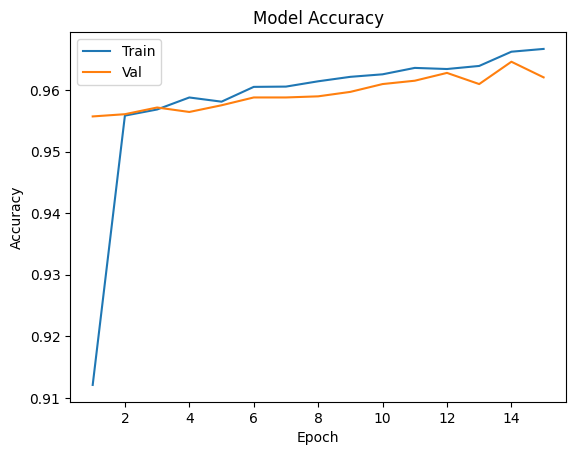

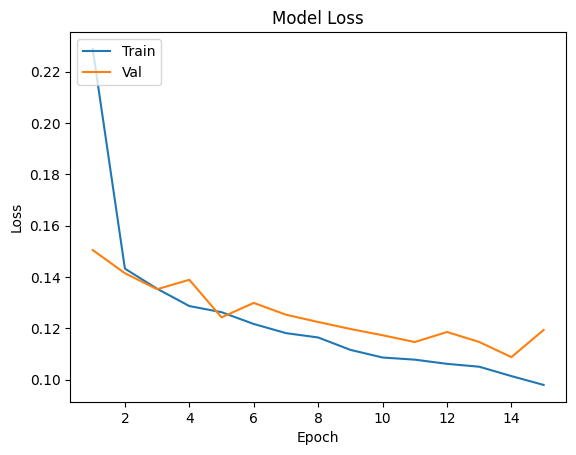

In [65]:
plot_learningCurve(history, 15)

173/173 [==============================] - 2s 13ms/step


<Figure size 1000x1000 with 0 Axes>

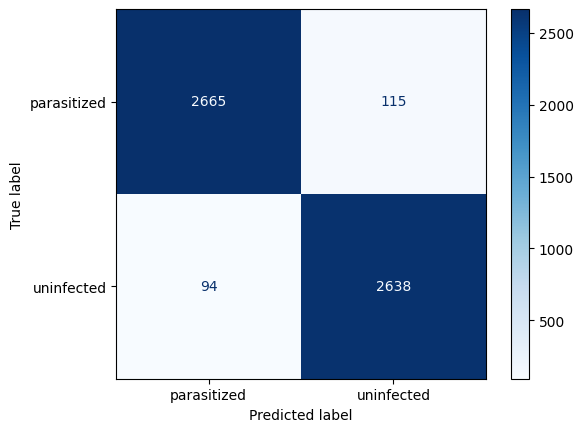

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Making predictions with the model
val_images, val_labels = next(iter(val_ds.unbatch().batch(len(ds_validation))))
val_predictions = model.predict(val_images)
val_pred_classes = (val_predictions > 0.5).astype(int)  # Binary classification threshold

# Computing the confusion matrix
cm = confusion_matrix(val_labels, val_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ds_info.features['label'].names)

# Plotting the confusion matrix
plt.figure(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues)
plt.show()